In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv("../Data/Hotels_Best_Discount.csv")

X = df[["Snapshot Date", "Checkin Date", "DayDiff", "WeekDay", "Hotel_Encoded_Name"]]
y = df["Discount Code"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

**Decision Tree Hyperparameters Overview**

- criterion – Determines how the decision tree selects the best feature to split at each step. It measures the "impurity" of a node and aims to reduce it with each split.

- max_depth – Controls the maximum depth of the tree. Limiting depth helps prevent overfitting by restricting how complex the tree can become.

- min_samples_split – Defines the minimum number of samples required to split an internal node. Higher values reduce overfitting by ensuring splits happen only when enough data is available.

- min_samples_leaf – Specifies the minimum number of samples required in a leaf node. This prevents the model from creating overly specific splits with very few samples.

- max_features – Determines the number of features to consider when looking for the best split at each node. Restricting this value can help improve generalization and reduce computation time.









In [3]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"], # default="gini"
    "max_depth": [None, 20, 30, 40], # max_depth=None means unlimited depth
    "min_samples_split": [2, 3, 4, 5], # default=2
    "min_samples_leaf": [1, 2, 3, 4], # default=1
    "max_features": ["sqrt", "log2", None] # default=None
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

print("\nTop 5 Decision Tree Models (based on test accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

print("\nWorst 5 Decision Tree Models:")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_dt_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_dt_params)


Top 5 Decision Tree Models (based on test accuracy):
Model 321: Accuracy=0.7507, Params={'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 513: Accuracy=0.7507, Params={'criterion': 'log_loss', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 417: Accuracy=0.7501, Params={'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 369: Accuracy=0.7501, Params={'criterion': 'entropy', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 225: Accuracy=0.7501, Params={'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Worst 5 Decision Tree Models:
Model 32: Accuracy=0.5437, Params={'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Model 173: Accuracy=0.5437, Param

**We fount ou that:**
- criterion better not to be gini
- max_depth better to be close to 30
- max_features better to be None the deafult value
- min_samples_leaf better to be 1
- min_samples_split better to be 2


In [4]:
param_grid = {
    "criterion": ["entropy", "log_loss"], # default="gini"
    "max_depth": [20,21,22,23,24,25,26,27,28,29,30], # max_depth=None means unlimited depth
    "min_samples_split": [2], # default=2
    "min_samples_leaf": [1], # default=1
    "max_features": [None] # default=None
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 Decision Tree Models (based on test accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")


best_dt_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_dt_params)


Top 5 Decision Tree Models (based on test accuracy):
Model 22: Accuracy=0.7507, Params={'criterion': 'log_loss', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 11: Accuracy=0.7507, Params={'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 10: Accuracy=0.7500, Params={'criterion': 'entropy', 'max_depth': 29, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 21: Accuracy=0.7500, Params={'criterion': 'log_loss', 'max_depth': 29, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 8: Accuracy=0.7499, Params={'criterion': 'entropy', 'max_depth': 27, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Hyperparameters Found:
{'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [5]:
best_dt = DecisionTreeClassifier(**best_dt_params, random_state=42)
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.4f}")


Test Set Accuracy: 0.7981


In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
fn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  
precision = np.diag(conf_matrix) / (np.diag(conf_matrix) + fp)
recall = np.diag(conf_matrix) / (np.diag(conf_matrix) + fn)

In [7]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nFalse Positives (FP) per class:")
print(fp)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7981
ROC AUC Score: 0.8640

False Positives (FP) per class:
[1086 1306 1196  744]

Classification Report:


              precision    recall  f1-score   support

           1       0.81      0.80      0.80      5609
           2       0.81      0.80      0.80      6830
           3       0.79      0.80      0.80      5773
           4       0.77      0.78      0.78      3248

    accuracy                           0.80     21460
   macro avg       0.80      0.80      0.80     21460
weighted avg       0.80      0.80      0.80     21460



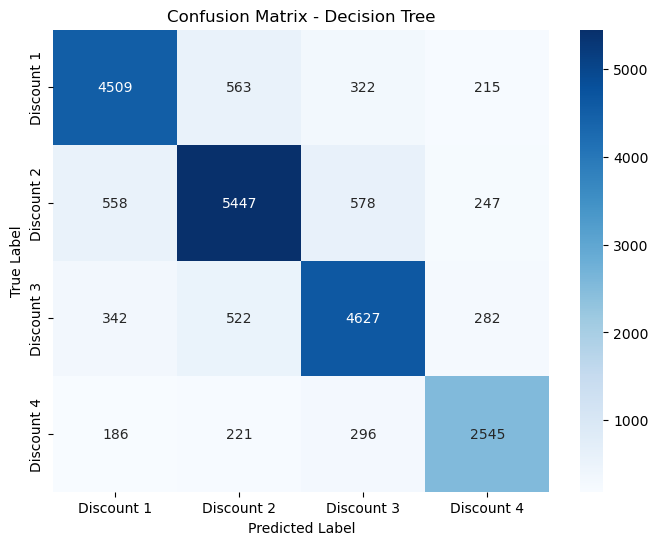

In [8]:

classes = [f"Discount {i}" for i in range(1, len(conf_matrix) + 1)]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



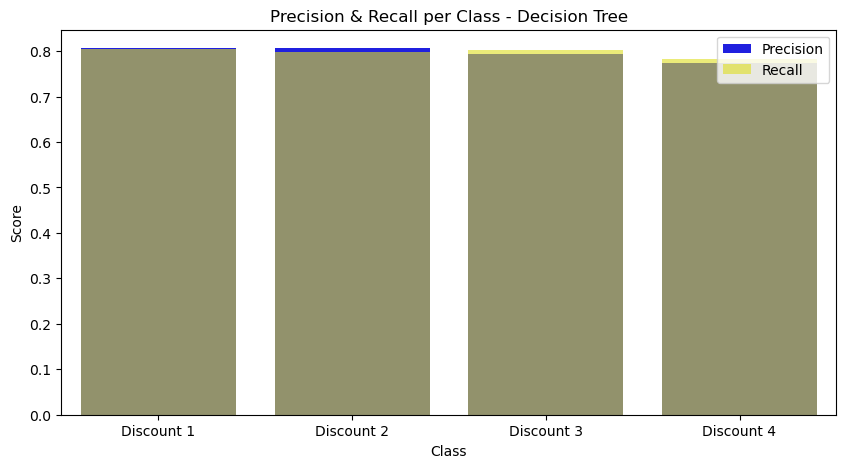

In [9]:
# Plot Precision & Recall per Class
df_metrics = pd.DataFrame({"Class": classes, "Precision": precision, "Recall": recall})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="Precision", data=df_metrics, color="blue", label="Precision")
sns.barplot(x="Class", y="Recall", data=df_metrics, color="yellow", alpha=0.6, label="Recall")
plt.ylabel("Score")
plt.title("Precision & Recall per Class - Decision Tree")
plt.legend()
plt.show()



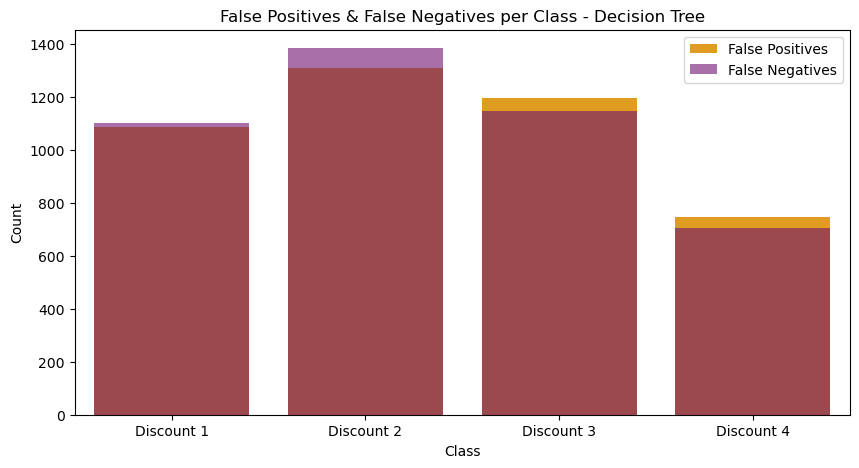

In [10]:
# Plot False Positives & False Negatives per Class
df_fp_fn = pd.DataFrame({"Class": classes, "False Positives": fp, "False Negatives": fn})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="False Positives", data=df_fp_fn, color="orange", label="False Positives")
sns.barplot(x="Class", y="False Negatives", data=df_fp_fn, color="purple", alpha=0.6, label="False Negatives")
plt.ylabel("Count")
plt.title("False Positives & False Negatives per Class - Decision Tree")
plt.legend()
plt.show()


In [11]:
best_dt_limited = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,  
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

best_dt_limited.fit(X_train, y_train)
y_pred = best_dt_limited.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.3727


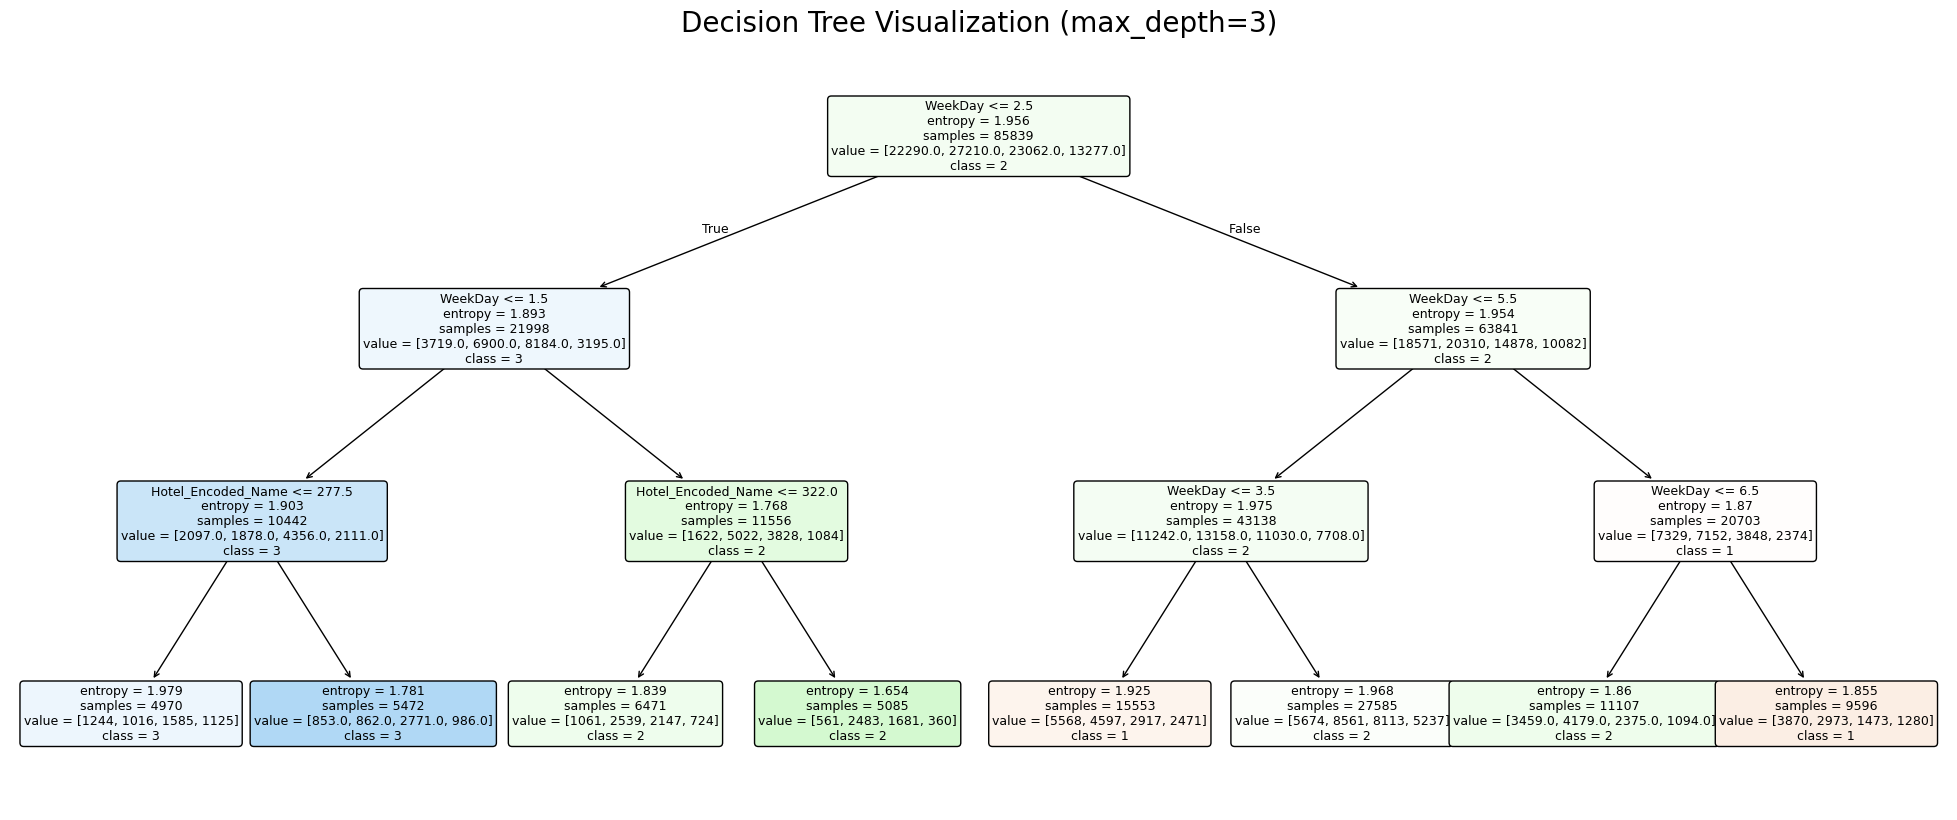

In [12]:
plt.figure(figsize=(25, 10)) 
plot_tree(
    best_dt_limited,
    feature_names=X.columns,
    class_names=[str(i) for i in np.unique(y_train)],
    filled=True,
    rounded=True,
    fontsize=9 
)
plt.title("Decision Tree Visualization (max_depth=3)", fontsize=20) 
plt.show()

**In conclusion**:
___

The Best Hyperparameters Found:{criterion: entropy, max_depth: 30, max_features: None, min_samples_leaf: 1, min_samples_split: 2}.
Of course there are more params for this algorithm, but we tried to examine the parameters that seemed most significant to us.

We discovered that the parameter that most affects the accuracy of the algorithm is the depth of the tree, which should be able to reach the highest percentages on our data. The depth better to be 30, which is 2 times deeper than the Log2 of the number of rows we have in the table. We assume that this is because there is an underrepresentation of class number 4 in our data. Which attracts the tree to try to make more and more decisions until it finds the right combination for class number 4.